# Customer Segmentation using RFM

**RFM** is an analysis that enables customers to be divided into groups by making use of their purchasing habits and to determine strategies specific to these groups.
Each letter that makes up the RFM abbreviation actually corresponds to the Recency, Frequency, and Monetary metrics. These metrics are significant indicators of customer behavior.

**Recency**: It is obtained by calculating the time elapsed since the last purchase date of the customer on a day-to-day basis.

**Frequency**: It is the metric that shows the frequency of the customer's purchase. It is found by the total number of transactions.

**Monetary**: It is the answer to the question of how much money the customer has left in total.

With these metrics, RFM scores can be calculated and action decisions can be taken for each segment created according to the scores.

## Loading Libraries

In [38]:
import pandas as pd 
import numpy as np
import datetime as dt

## Understanding and Preparing Data

In [150]:
#Setting row and column views
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 150)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [153]:
retail = pd.read_excel('C:/Users/melih.sari/OneDrive - Vakko Tekstil ve Hazır Giyim İşl. Sanayi A.Ş/Desktop/online_retail_II.xlsx',
                       sheet_name='Year 2010-2011')
retail= retail.copy()
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


In [41]:
# Examining the descriptive statistics of the dataset
retail.shape

(541910, 8)

In [154]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [155]:
retail.describe()

,Quantity,Price,Customer ID
count,541910.00,541910.00,406830.00
mean,9.55,4.61,15287.68
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


In [43]:
# Missing observations in the dataset
retail.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [157]:
#Removing the missing observations from the dataset.
retail.dropna(inplace = True)

In [ ]:
#Removal of canceled transactions
retail[~retail['Invoice'].str.contains("C", na = False)]

In [156]:
retail.shape

(541910, 8)

In [47]:
# Unique number of products
retail["StockCode"].nunique()

3684

In [48]:
## How many of each product are there?
retail["StockCode"].value_counts().head()

85123A    2077
22423     1905
85099B    1662
84879     1418
47566     1416
Name: StockCode, dtype: int64

In [49]:
# Sorting the 5 most ordered products from most to least
retail_most=retail.groupby('Description').agg({'Quantity':'sum'}).sort_values('Quantity',ascending=False)
retail_most.head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
JUMBO BAG RED RETROSPOT,45066
ASSORTED COLOUR BIRD ORNAMENT,35314
WHITE HANGING HEART T-LIGHT HOLDER,34147
PACK OF 72 RETROSPOT CAKE CASES,33409


In [65]:
# 'TotalPrice' represents the total earnings per invoice
retail = retail[retail["Quantity"] > 0]
retail = retail[retail["Price"] > 0]
retail["TotalPrice"] = retail["Quantity"] * retail["Price"]
retail.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85
541909,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France,18.00


In [66]:
retail["TotalPrice"]

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541905    12.60
541906    16.60
541907    16.60
541908    14.85
541909    18.00
Name: TotalPrice, Length: 397885, dtype: float64

In [67]:
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


## Calculating RFM Metrics

In [69]:
#For the recency value, accept today's date as (2011, 12, 11)
today_date=dt.datetime(2011,12,11)

# Describing Recency, Frequency, Monetary.
# recency : Time since last purchase (in days)
# frequency : Frequency of purchase
# monetary : Total money earned by the customer

rfm = retail.groupby('Customer ID').agg({'InvoiceDate' : lambda InvoiceDate : (today_date - InvoiceDate.max()).days,
                                     'Invoice' : lambda Invoice : Invoice.nunique(),
                                     'TotalPrice' : lambda TotalPrice : TotalPrice.sum()})


In [70]:
#Renaming of the metrics
rfm.columns=['recency','frequency','monetary']
# Filtering  "monetary>0"
rfm=rfm[rfm["monetary"]>0]
rfm.head()

,recency,frequency,monetary
Customer ID,,,
12346.0,326,1,77183.60
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40


## Generating and Converting RFM Scores to a Single Variable

In [73]:
#Converting to scores between 1-5.
# Recency
rfm['recency_score'] = pd.qcut(rfm['recency'], 5, labels = [5,4,3,2,1])
# Frequency
rfm['frequency_score'] = pd.qcut(rfm['frequency'].rank(method = 'first'), 5, labels = [1,2,3,4,5])
# Monetary
rfm['monetary_score'] = pd.qcut(rfm['monetary'], 5, labels = [1,2,3,4,5])

# It is more important to know the customer's purchase frequency and how long they have not shopped
rfm["RFM_SCORE"]  = (rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str))
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
Customer ID,,,,,,,
12346.0,326,1,77183.60,1,1,5,11
12347.0,3,7,4310.00,5,5,5,55
12348.0,76,4,1797.24,2,4,4,24
12349.0,19,1,1757.55,4,1,4,41
12350.0,311,1,334.40,1,1,2,11


## Defining RFM Scores as Segments

In [75]:
#Making segment definitions
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
rfm.head()


,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
Customer ID,,,,,,,,
12346.0,326,1,77183.60,1,1,5,11,hibernating
12347.0,3,7,4310.00,5,5,5,55,champions
12348.0,76,4,1797.24,2,4,4,24,at_Risk
12349.0,19,1,1757.55,4,1,4,41,promising
12350.0,311,1,334.40,1,1,2,11,hibernating


In [77]:
# Analysis of RFM segments on the basis of mean and number
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"])

recency        frequency           monetary      
                           mean count       mean count         mean count
segment                                                                  
about_to_sleep        53.312500   352   1.161932   352   471.994375   352
at_Risk              153.785835   593   2.876897   593  1084.535297   593
cant_loose           132.968254    63   8.380952    63  2796.155873    63
champions              6.361769   633  12.413902   633  6857.963918   633
hibernating          217.605042  1071   1.101774  1071   488.643307  1071
loyal_customers       33.608059   819   6.479853   819  2864.247791   819
need_attention        52.427807   187   2.326203   187   897.627861   187
new_customers          7.428571    42   1.000000    42   388.212857    42
potential_loyalists   17.398760   484   2.010331   484  1041.222004   484
promising             23.510638    94   1.000000    94   294.007979    94

## Actions

 **Potential Loyalists**
 
Potential loyalists are your customers who spend on average and in good amounts. The purchasing frequency of this segment, whose last purchase was made 17.40 days ago on average, is 2.01.

**Possible Actions**

Actions can be taken to make customers in this segment feel special, such as special personal messages and birthday celebrations. In addition, sharing new products with these people first will be effective in maintaining customer loyalty.

**Can’t Lose Them**

Customers in this segment are in close rank with loyal customers in terms of the money they leave in proportion to their numbers. In terms of purchase frequency, they are second only to champions. In fact, they do not buy but take action for an average of 132.97 days despite their high frequency.

**Possible Actions**

* Customers in this segment can be encouraged to purchase by sending regular notifications, discount messages and product recommendations.
* It may be necessary to obtain information about why they have not shopped recently by sending various surveys and to take actions accordingly.

**Hibernating**

They are actually customers whose potential has not yet been activated. This segment has the highest number of customers among all segments. On average, 217.61 days have passed since the last purchases of customers in this segment. While their purchasing frequency is 1.10, their monetary return is 488.64 units. We can say that they are in bad shape in terms of all three scores.

**Possible Actions**

Creating a triggering opportunity for customers in this segment to interact with a limited-time discount can be effective.

In [81]:
rfm[rfm["segment"] == "loyal_customers"].head()

# Selecting of loyal customers id
new_df = pd.DataFrame()
new_df["loyal_customers_id"] = rfm[rfm["segment"]== "loyal_customers"].index
new_df=new_df["loyal_customers_id"].astype(int)
new_df

0      12352
1      12359
2      12370
3      12380
4      12388
       ...  
814    18236
815    18257
816    18259
817    18263
818    18287
Name: loyal_customers_id, Length: 819, dtype: int32

In [82]:
# Saving as a csv
new_df.to_csv("loyal_customers.csv")

# Customer Segmentation with K-Means Clustering

In [102]:
import seaborn as sns
from matplotlib import pyplot as plt

C:\Users\melih.sari\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


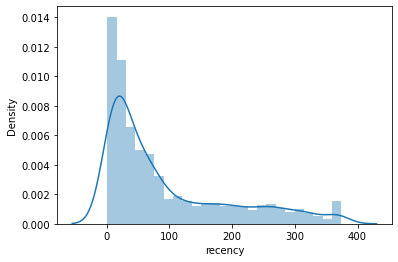

In [106]:
sns.distplot(rfm["recency"])
plt.show()

C:\Users\melih.sari\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


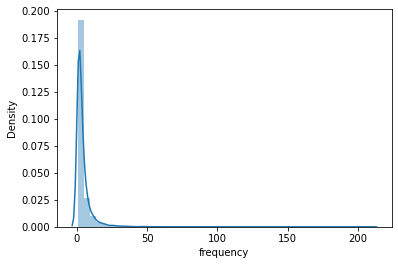

In [107]:
sns.distplot(rfm["frequency"])
plt.show()

C:\Users\melih.sari\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='monetary', ylabel='Density'>

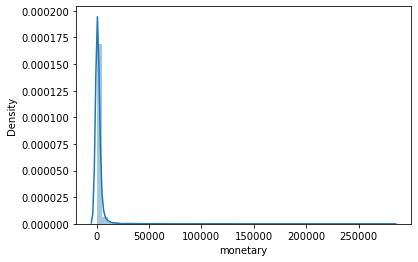

In [108]:
sns.distplot(rfm["monetary"])

In [88]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
Customer ID,,,,,,,,
12346.0,326,1,77183.60,1,1,5,11,hibernating
12347.0,3,7,4310.00,5,5,5,55,champions
12348.0,76,4,1797.24,2,4,4,24,at_Risk
12349.0,19,1,1757.55,4,1,4,41,promising
12350.0,311,1,334.40,1,1,2,11,hibernating


In [90]:
cluster=rfm[["recency","frequency","monetary"]]

In [91]:
cluster.head()

,recency,frequency,monetary
Customer ID,,,
12346.0,326,1,77183.60
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40


In [92]:
clusterdata=cluster.iloc[:,0:4]
clusterdata.head()

,recency,frequency,monetary
Customer ID,,,
12346.0,326,1,77183.60
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40


In [110]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
x_scaled=min_max_scaler.fit_transform(cluster)
data_scaled2=pd.DataFrame(x_scaled)

In [111]:
data_scaled2.head()

,0,1,2
0,0.871314,0.000000,0.275443
1,0.005362,0.028846,0.015368
2,0.201072,0.014423,0.006401
3,0.048257,0.000000,0.006259
4,0.831099,0.000000,0.001180


In [112]:
data_scaled2.describe()

,0,1,2
count,4338.000000,4338.000000,4338.000000
mean,0.246808,0.015731,0.007318
std,0.268129,0.037010,0.032081
min,0.000000,0.000000,0.000000
25%,0.045576,0.000000,0.001084
50%,0.134048,0.004808,0.002394
75%,0.380027,0.019231,0.005917
max,1.000000,1.000000,1.000000


In [115]:
from sklearn.cluster import KMeans

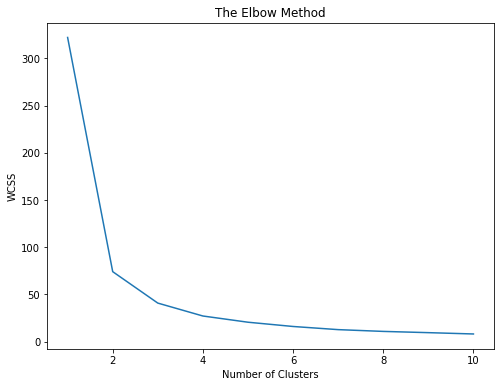

In [116]:
plt.figure(figsize=(8,6))
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i , init='k-means++',n_init=10, max_iter=300)
    kmeans.fit(data_scaled2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [118]:
from sklearn.metrics import silhouette_score
inertia_list=[]
silhouette_score_list=[]
for i in range(2,10):
    #kmeans=KMeans(n_clusters=i , init='k-means++',n_init=10, max_iter=300)
    kmeans.fit(data_scaled2)
    silhouette_score_list.append(silhouette_score(data_scaled2,kmeans.labels_))
    print(silhouette_score_list)

    

[0.4873937116653258]
[0.4873937116653258, 0.4881932605311758]
[0.4873937116653258, 0.4881932605311758, 0.4803965385065335]
[0.4873937116653258, 0.4881932605311758, 0.4803965385065335, 0.46498464374159915]
[0.4873937116653258, 0.4881932605311758, 0.4803965385065335, 0.46498464374159915, 0.4876022316401459]
[0.4873937116653258, 0.4881932605311758, 0.4803965385065335, 0.46498464374159915, 0.4876022316401459, 0.4957444752760247]
[0.4873937116653258, 0.4881932605311758, 0.4803965385065335, 0.46498464374159915, 0.4876022316401459, 0.4957444752760247, 0.48331101616774336]
[0.4873937116653258, 0.4881932605311758, 0.4803965385065335, 0.46498464374159915, 0.4876022316401459, 0.4957444752760247, 0.48331101616774336, 0.5016233237798807]


In [134]:
kmeans=KMeans(n_clusters=4 , init='k-means++',random_state=0, n_init=10, max_iter=300)
kmeans.fit(data_scaled2)
pred=kmeans.predict(data_scaled2)

In [135]:
pred=kmeans.predict(data_scaled2)

In [136]:
d_frame=pd.DataFrame(cluster)
d_frame['cluster']=pred
d_frame['cluster'].value_counts()

0    2142
2    1082
1     616
3     498
Name: cluster, dtype: int64

In [137]:
d_frame.groupby('cluster').mean()

,recency,frequency,monetary
cluster,,,
0,19.887021,6.475257,3310.473633
1,192.219156,1.866883,726.504839
2,81.904806,2.624769,1008.393283
3,309.369478,1.349398,565.829056
